**Author**: CodeForAll  
**License**: MIT License

--- 


# PID Controllers — A Quick Overview

A **PID controller** is a control loop mechanism widely used in industrial and engineering applications. It continuously calculates an error value as the difference between a **desired setpoint** and a **measured process variable**, and applies a correction based on **Proportional (P), Integral (I), and Derivative (D)** terms.

---

## 🔧 Components of PID

### 1. **Proportional (P)**
- Reacts to **current error**
- Correction is **proportional** to how far the system is from the target
- Higher gain → faster response
- But may result in **overshoot** and **steady-state error**

**Control law:**

$$
P_{\text{output}} = K_p \cdot e(t)
$$

---

### 2. **Integral (I)**
- Reacts to **accumulated past error**
- Helps eliminate **steady-state error**
- Too much $I$ → system can become **sluggish** or **oscillatory**

**Control law:**

$$
I_{\text{output}} = K_i \int_0^t e(\tau) \, d\tau
$$

---

### 3. **Derivative (D)**
- Reacts to **rate of change** of the error
- Acts like a **brake**: anticipates future error based on how fast error is changing
- Helps reduce **overshoot** and **oscillations**
- Sensitive to **noise**

**Control law:**

$$
D_{\text{output}} = K_d \frac{de(t)}{dt}
$$

---

## 🧠 Total PID Control Law

$$
u(t) = K_p \cdot e(t) + K_i \int_0^t e(\tau) \, d\tau + K_d \frac{de(t)}{dt}
$$

Where:
- $u(t)$ is the control output
- $e(t)$ is the error at time $t$
- $K_p$, $K_i$, $K_d$ are tuning gains

---

## ⚙️ Tuning PID

- Start with **P only**, increase until the system responds quickly but not wildly
- Add **I** to remove steady-state error
- Add **D** to smooth and stabilize the response
- Methods: Manual tuning, Ziegler-Nichols, Cohen-Coon, software-based autotuning

---

## 📊 Summary Table

| Term | Effect | Pros | Cons |
|------|--------|------|------|
| P | Reacts to present error | Fast response | Can overshoot, may not reach setpoint |
| I | Reacts to past error | Removes steady-state error | Can slow system, cause oscillations |
| D | Predicts future error | Reduces overshoot, adds stability | Sensitive to noise |

---

## 🚀 Applications

- Temperature control
- Motor speed control
- Cruise control
- Robotics
- Process automation


# 🚀 PID Control Experiment: Step Response of a Second-Order System

This experiment investigates how different types of controllers — **Proportional (P)**, **Proportional-Integral (PI)**, and **Proportional-Integral-Derivative (PID)** — affect the dynamic behavior of a simple second-order plant when subjected to a step input.

---

## ⚙️ System Under Test

We analyze a **second-order system** (also called the "plant") described by the transfer function:

$$
G(s) = \frac{1}{s^2 + 2s + 1}
$$

This represents a **critically damped** system, meaning it returns to equilibrium without oscillating, but not as quickly as an underdamped one.

---

## 🎯 Objective

To observe how the system responds to a step input when different controllers are applied in a unity feedback configuration:
- **P Controller**
- **PI Controller**
- **PID Controller**

Each controller has a different influence on:
- Rise time
- Overshoot
- Settling time
- Steady-state error

---

## 🛠️ Controller Descriptions

### 🔹 P (Proportional) Controller

- **Form:** $C(s) = K_p$
- Multiplies the error by a constant gain.
- Improves response speed but may lead to steady-state error or overshoot.

---

### 🔸 PI (Proportional-Integral) Controller

- **Form:** $C(s) = K_p + \frac{K_i}{s}$
- Eliminates steady-state error by integrating the error over time.
- Can introduce overshoot or slower settling.

---

### 🔺 PID (Proportional-Integral-Derivative) Controller

- **Form:** $C(s) = K_p + \frac{K_i}{s} + K_d s$
- Adds damping via the derivative term to anticipate system behavior.
- Reduces overshoot and improves stability.

---

## 🔁 Closed-Loop Configuration

All controllers are placed in a **unity feedback loop**:

$$
T(s) = \frac{C(s)G(s)}{1 + C(s)G(s)}
$$

This setup allows the system to automatically respond to deviations from the setpoint.

---

## 📊 Results & Observations

A step input was applied to each closed-loop system, and the resulting output was observed over time.

| Controller | Rise Time | Overshoot | Steady-State Error | Stability |
|------------|-----------|-----------|---------------------|-----------|
| P          | Fast      | Some      | Present             | Stable    |
| PI         | Medium    | More      | Eliminated          | Stable    |
| PID        | Fast      | Minimal   | Eliminated          | More Stable |

### ✅ Key Takeaways:
- **P** speeds up the response but can't eliminate steady-state error.
- **PI** removes steady-state error but can cause overshoot.
- **PID** provides the best balance: fast, accurate, and stable.

---

## 📌 Conclusion

PID control is often preferred when precise, smooth, and fast system behavior is required. This experiment visually demonstrates how each component (P, I, D) contributes to shaping the response of a second-order system.


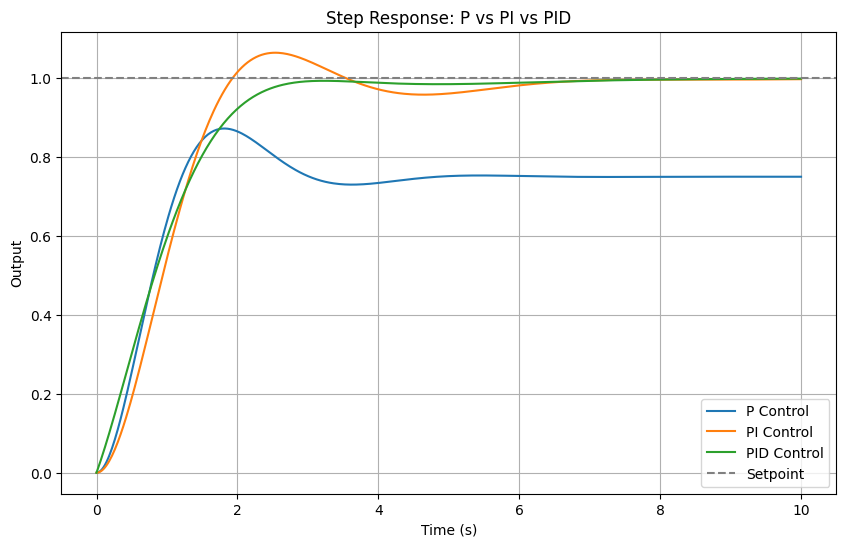

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Simple second-order plant: G(s) = 1 / (s^2 + 2s + 1)
num = [1]
den = [1, 2, 1]
plant = ctrl.tf(num, den)

# Time vector
t = np.linspace(0, 10, 500)

# Define controllers
C_p = ctrl.tf([3], [1])             # P
C_pi = ctrl.tf([2, 1], [1, 0])      # PI
C_pid = ctrl.tf([0.5, 2, 1], [1, 0])  # PID

# Closed-loop transfer functions
T_p = ctrl.feedback(C_p * plant, 1)
T_pi = ctrl.feedback(C_pi * plant, 1)
T_pid = ctrl.feedback(C_pid * plant, 1)

# Step responses
t1, y_p = ctrl.step_response(T_p, t)
t2, y_pi = ctrl.step_response(T_pi, t)
t3, y_pid = ctrl.step_response(T_pid, t)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(t1, y_p, label='P Control')
plt.plot(t2, y_pi, label='PI Control')
plt.plot(t3, y_pid, label='PID Control')
plt.axhline(1, color='gray', linestyle='--', label='Setpoint')
plt.title('Step Response: P vs PI vs PID')
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.grid(True)
plt.legend()
plt.show()
